In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('seaborn-whitegrid')

In [21]:
df = pd.read_csv("ambu3.csv")

In [22]:
df["Date"] = pd.to_datetime(df[['Dia','Hora', 'Minuto', 'Segundo', 'Microsegundo']].astype(str).agg(' '.join,1), format='%Y-%m-%d %H %M %S %f')
df = df.drop(['Dia','Hora', 'Minuto', 'Segundo', 'Microsegundo'], axis=1)
df = df.rename(columns={'flujo': 'presion', 'presion': 'flujo'})

In [23]:
df

,flujo,presion,Date
0,-12.6,15.7,2020-09-30 12:26:24.225909
1,-10.0,14.3,2020-09-30 12:26:24.282936
2,-7.5,13.3,2020-09-30 12:26:24.338277
3,-5.4,13.3,2020-09-30 12:26:24.397804
4,-4.9,11.7,2020-09-30 12:26:24.444495
...,...,...,...
3939,3.6,56.0,2020-09-30 12:29:38.256452
3940,-10.6,54.5,2020-09-30 12:29:38.307561
3941,-10.6,53.1,2020-09-30 12:29:38.356702
3942,-37.8,49.5,2020-09-30 12:29:38.407273


Text(0.5, 1.0, 'Flujo')

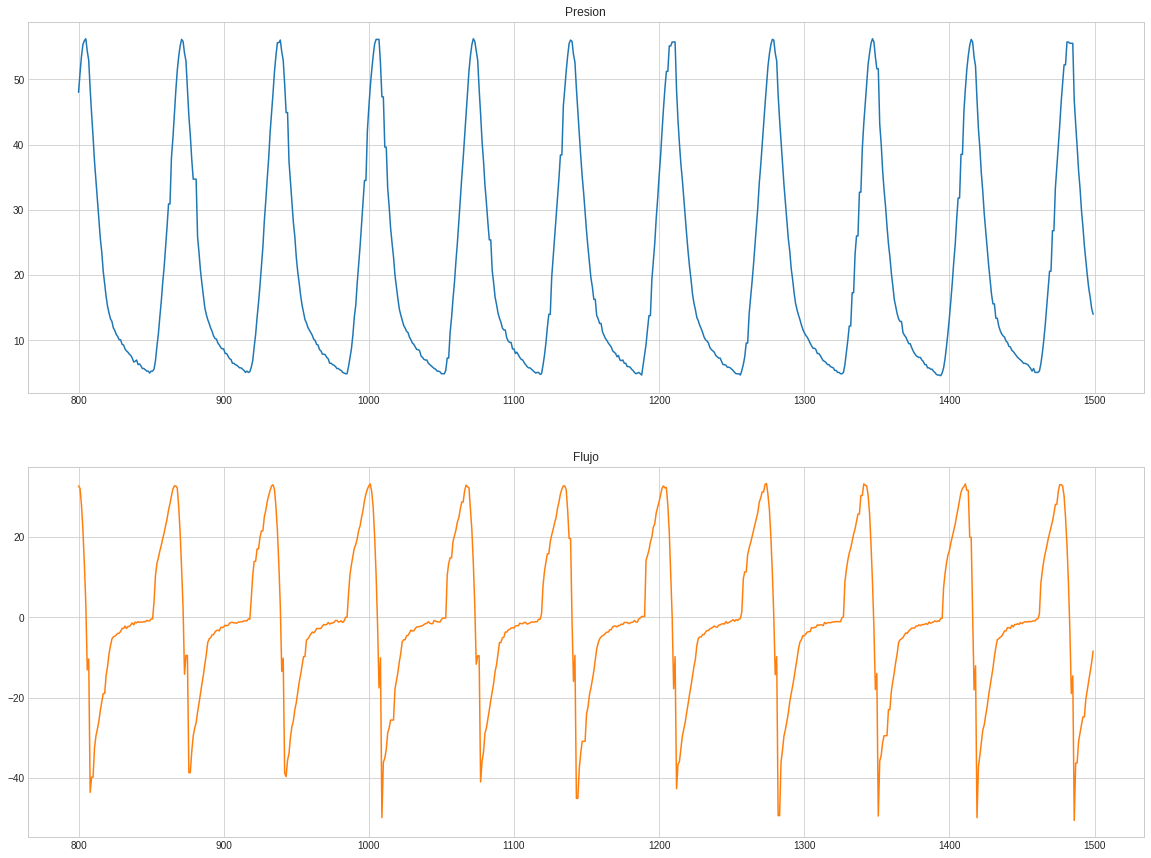

In [24]:
fig, axs = plt.subplots(2, figsize=(20,15))
axs[0].plot(df['presion'][800:1500], 'tab:blue')
axs[0].set_title('Presion')
axs[1].plot(df['flujo'][800:1500], 'tab:orange')
axs[1].set_title('Flujo')

In [6]:
change_NegToPos = []
change_PosToNeg = []
for i in range(len(df[:1500])):
  try:
    if df.loc[i-1, 'flujo'] <= 0 and df.loc[i, 'flujo'] > 0:
      if change_NegToPos == []:
        change_NegToPos.append(i)
      elif (i - change_NegToPos[-1]) > 1:
        change_NegToPos.append(i)
      
    elif df.loc[i-1, 'flujo'] > 0 and df.loc[i, 'flujo'] <= 0:
      if change_PosToNeg == []:
        change_PosToNeg.append(i)
      elif (i - change_PosToNeg[-1]) > 1:
        change_PosToNeg.append(i)
  except:
    pass

In [7]:
print(len(change_NegToPos), change_NegToPos)
print(len(change_PosToNeg), change_PosToNeg)

22 [33, 102, 173, 240, 307, 374, 442, 509, 577, 645, 716, 785, 852, 919, 986, 1054, 1119, 1188, 1257, 1327, 1396, 1462]
22 [55, 124, 194, 261, 328, 395, 462, 530, 599, 667, 736, 806, 873, 940, 1006, 1074, 1140, 1209, 1280, 1348, 1417, 1483]


In [8]:
print('PIP values:')
for i in range(len(change_NegToPos)):
  try:
    print(df['presion'][change_NegToPos[i]:change_NegToPos[i+1]].max())
    
  except:
    pass

print('\nPEEP values:')
for i in range(len(change_NegToPos)):
  try:
    print(df['presion'][change_PosToNeg[i]:change_PosToNeg[i+1]].min())
  except:
    pass

PIP values:
56.2
56.2
56.4
56.1
56.2
56.3
55.6
56.2
56.1
56.0
56.4
56.2
56.1
56.0
56.1
56.2
56.0
55.7
56.1
56.2
56.1

PEEP values:
5.0
4.9
5.1
5.3
4.8
4.8
4.9
5.0
5.0
5.0
4.7
5.0
5.1
4.9
4.9
4.8
4.7
4.7
4.9
4.6
5.1


In [9]:
print('Time values:')
for i in range(len(change_NegToPos)):
  try:
    print("\n BPM:", 60.0 / (df['Date'][change_NegToPos[i+1]] - df['Date'][change_NegToPos[i]]).total_seconds())
    print(" TR:", (df['Date'][change_NegToPos[i+1]] - df['Date'][change_NegToPos[i]]).total_seconds())
  except:
    pass

Time values:

 BPM: 17.990470447803798
 TR: 3.335099

 BPM: 17.707070167511834
 TR: 3.388477

 BPM: 17.88260427942642
 TR: 3.355216

 BPM: 18.010467683817836
 TR: 3.331396

 BPM: 17.877297381691026
 TR: 3.356212

 BPM: 16.90604213492881
 TR: 3.549027

 BPM: 18.84403763656824
 TR: 3.184031

 BPM: 17.95006113491655
 TR: 3.342607

 BPM: 16.1128674136592
 TR: 3.723732

 BPM: 19.648224733774743
 TR: 3.053711

 BPM: 18.053854648416227
 TR: 3.32339

 BPM: 17.853604017775048
 TR: 3.360666

 BPM: 17.879252468454293
 TR: 3.355845

 BPM: 17.850390521918644
 TR: 3.361271

 BPM: 17.615128812097367
 TR: 3.406163

 BPM: 18.320219109820552
 TR: 3.27507

 BPM: 17.833221925233026
 TR: 3.364507

 BPM: 17.844306640134164
 TR: 3.362417

 BPM: 17.880291448750615
 TR: 3.35565

 BPM: 16.99967133968743
 TR: 3.52948

 BPM: 18.851290339404915
 TR: 3.182806


In [10]:
ti_values = []
print('TI values:')
for i in range(len(change_NegToPos)):
  try:
    ti_values.append((df['Date'][change_PosToNeg[i]] - df['Date'][change_NegToPos[i]]).total_seconds())
    print((df['Date'][change_PosToNeg[i]] - df['Date'][change_NegToPos[i]]).total_seconds())
    
  except:
    pass

TI values:
1.068178
1.04119
1.054489
1.034893
1.056192
1.046368
1.6412
1.029809
1.066048
0.696942
0.977994
1.055808
1.056511
1.050826
1.012671
1.006014
1.047336
1.040842
1.079613
1.047219
1.63518
1.055219


In [ ]:
te_values = []
print('TI values:')
for i in range(len(change_NegToPos)):
  try:
    te_values.append((df['Date'][change_NegToPos[i+1]] - df['Date'][change_PosToNeg[i]]).total_seconds())
    print((df['Date'][change_NegToPos[i+1]] - df['Date'][change_PosToNeg[i]]).total_seconds())
    
  except:
    pass

TI values:
2.266921
2.347287
2.300727
2.296503
2.30002
2.502659
1.542831
2.312798
2.657684
2.356769
2.345396
2.304858
2.299334
2.310445
2.393492
2.269056
2.317171
2.321575
2.276037
2.482261
1.547626


In [ ]:
print(len(ti_values), ti_values)
print(len(te_values), te_values)

22 [1.068178, 1.04119, 1.054489, 1.034893, 1.056192, 1.046368, 1.6412, 1.029809, 1.066048, 0.696942, 0.977994, 1.055808, 1.056511, 1.050826, 1.012671, 1.006014, 1.047336, 1.040842, 1.079613, 1.047219, 1.63518, 1.055219]
21 [2.266921, 2.347287, 2.300727, 2.296503, 2.30002, 2.502659, 1.542831, 2.312798, 2.657684, 2.356769, 2.345396, 2.304858, 2.299334, 2.310445, 2.393492, 2.269056, 2.317171, 2.321575, 2.276037, 2.482261, 1.547626]


In [ ]:
ie_values = list(zip(ti_values, te_values))

In [ ]:
for ti, te in ie_values:
  print("IE = 1:", te/ti)

IE = 1: 2.1222315007423855
IE = 1: 2.2544271458619463
IE = 1: 2.1818406830227723
IE = 1: 2.2190728896610565
IE = 1: 2.1776533054596134
IE = 1: 2.3917579666044833
IE = 1: 0.9400627589568609
IE = 1: 2.2458514151653364
IE = 1: 2.4930247043285103
IE = 1: 3.381585555182497
IE = 1: 2.3981701319231
IE = 1: 2.1830275959265317
IE = 1: 2.176346483851091
IE = 1: 2.19869417010999
IE = 1: 2.3635435398071043
IE = 1: 2.2554914742737178
IE = 1: 2.2124428072748383
IE = 1: 2.2304778246842463
IE = 1: 2.1081971039622536
IE = 1: 2.370336099707893
IE = 1: 0.9464560476522461
